## Tools used

>Python, Jupyter Notebook, pandas, matplotlib, numpy

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file="DigitalTurbine-ExcelTest4.1-David M-4-26-2022.xlsx"
df = pd.read_excel(file, sheet_name='Raw Data')

### 1. Calculate the monthly revenue from the unique IMEI's for the past year.



| Number of Active Devices | License Fees |
| ----------- | ----------- |
| 1-5000 | \$0.05 |
| 5001-7500 | \$0.04 |
| 7501-15000 | \$0.03 |
| 15000+ | \$0.02 |

#### Assumptions

- Each IMEI is a unique device

- Each month revenue is based on rolling total of number of unique active devices upto that month

- License fees are tiered instead of absolute
 - Eg: If number of active devices are 6000
  - the first 5000 are billed at 0.05
  - next 1000 are billed at 0.04 per device

#### Brief description
From startdate, month for each row is obtained. It is appended with IMEI to find unique (month, IMEI) combination.

Only unique values of IMEI's in a given month are kept.

Here is a plot of unique IMEI's each month.

In [ ]:
def calculateRevenue(rollingValue):
    if (rollingValue <= 5000):
        revenue = rollingValue*0.05
    elif (rollingValue <=7500):
        revenue = (rollingValue- 5000)*0.04+5000 * 0.05
    elif (rollingValue <=15000):
        revenue = (rollingValue- 7500)*0.03+2500*0.04+5000 * 0.05
    else :
        revenue = (rollingValue- 15000)*0.02+7500*0.03+2500*0.04+5000 * 0.05
    return (revenue)

Text(0, 0.5, 'Rolling total')

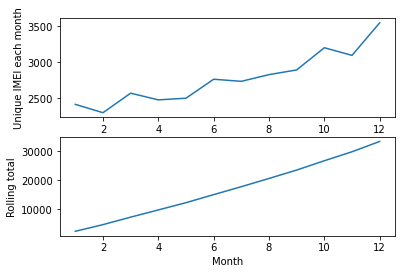

In [228]:
# create month column
df[['month', 'date']] = df['startdate'].str.split('/', 1, expand=True)

#create month_IMEI column
df['month_IMEI']= df['month'].astype(str)+"_"+df['imei'].astype(str)

#find unique month_IMEI values each month
dfUnique = df.drop_duplicates(subset=['month_IMEI'])

monthlyTotals = dfUnique.groupby(['month'])['imei'].count()
npTotals=np.array(monthlyTotals)
npMonths=np.arange(1,13,dtype=int)

rollingTotal =[]
rollingValue = 0
revenue=[]
for monthlyTotal in monthlyTotals:
    #print (monthlyTotal)
    rollingValue += monthlyTotal 
    #print (rollingValue)
    rollingTotal.append(rollingValue)
    revenue.append(calculateRevenue(rollingValue))

nprollingTotal= np.array(rollingTotal)
nprevenue=np.array(revenue)

#plot monthly unique users
plt.subplot(2,1,1)
plt.plot (npMonths,npTotals)
plt.ylabel('Unique IMEI each month')

#plot rolling total
plt.subplot(2,1,2)
plt.plot (npMonths,nprollingTotal)
plt.xlabel('Month')
plt.ylabel('Rolling total')

Text(7, 200, 'y=111.42 + 70.95x')

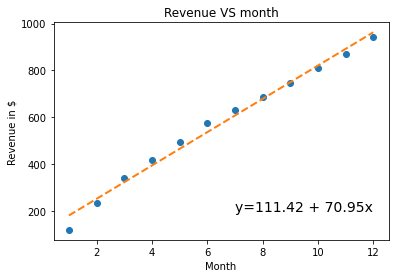

In [213]:
plt.plot (npMonths,revenue,'o')
plt.ylabel('Revenue in $')
plt.xlabel('Month')
plt.title("Revenue VS month")
#plt.legend("From raw data")

#find line of best fit for device total

md, bd = np.polyfit(months, nprollingTotal, 1)


#find line of best fit for revenue
m,b = np.polyfit(months, revenue, 1)

#npnextMonths = np.array(nextMonths)
#add line of best fit to plot
plt.plot(npMonths, m*npMonths + b,linestyle='--',linewidth=2)

#add fitted regression to plot
plt.text(7,200,'y='+'{:.2f}'.format(b) + ' + {:.2f}'.format(m) + 'x', size=14)




### 2. Forecast the next years devices and revenue based on historical information. 

#### Assumptions

- `Number of Active Devices` *continues to grow at same rate*
- `Revenue` is based on *rolling total* of Active Devices (does not reset at beginning of year)

Text(18, 1100, 'y=111.42 + 70.95x')

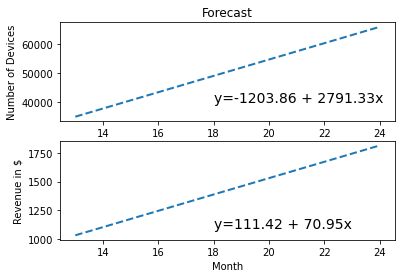

In [221]:
npMonthsNextYear=np.arange(13,25,dtype=int)

#forecast of next years devices
plt.subplot(2,1,1)
plt.plot(npMonthsNextYear, md*npMonthsNextYear + bd,linestyle='--',linewidth=2)
plt.title("Forecast")
plt.ylabel('Number of Devices')
plt.text(18,40000,'y='+'{:.2f}'.format(bd) + ' + {:.2f}'.format(md) + 'x', size=14)

# forecast of next years revenue
plt.subplot(2,1,2)
plt.plot(npMonthsNextYear, m*npMonthsNextYear + b,linestyle='--',linewidth=2)
plt.xlabel('Month')
plt.ylabel('Revenue in $')
plt.text(18,1100,'y='+'{:.2f}'.format(b) + ' + {:.2f}'.format(m) + 'x', size=14)



### 3. Create a calculator to project revenue and devices dependent on information provided by the account management team

#### Assumptions

- Number of Active Devices continues to grow at same rate
- Revenue is based on rolling total of Active Devices (does not reset at beginning of year)
- Lines of best fit have been created for `Number of Devices` and `Revenue`
 - Those are used to calculate/project revenue
 

In [226]:
#Number of Active devices = month*md + bd
#Revenue = month*m + b

currentMonth=int(input("Input month after last year: "))

currentActiveDevices = (currentMonth+12)*md + bd
currentRevenue = (currentMonth+12)*m + b


print ("Number of active Devices at month ", currentMonth, " is :",currentActiveDevices)

print ("Revenue at month", currentMonth, " is :$",currentRevenue)

Input month after last year: 12
Number of active Devices at month  12  is : 65787.94055944053
Revenue at month 12  is :$ 1814.1735081585075
